In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon

from datetime import timedelta


In [25]:
map = gpd.read_file('limite250_l.shp')
#fig, ax = plt.subplots(figsize=(15,15))
#map.plot(ax=ax)

In [9]:
data = pd.read_csv('data/2022.csv')
data

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Variedad,Etapa_Fenologica,...,ProductorID,AnoMapa,Version,SitioID,ActividadID,ID,AddRecord,ChangeRecord,SMARTPHONE,Anual
0,2022-07-29,20.54868,-89.93041,179_PRE-31-055-0296,OPICHEN,OPICHEN,FILBERTO RAMOS CHAN,MAIZ(Grano),Criollo,DESARROLLO VEGETATIVO,...,2033228,2022,44931.79313,318,308,716568,44771.44028,44771.45388,0,NaN
1,2022-10-31,20.54868,-89.93041,179_PRE-31-055-0296,OPICHEN,OPICHEN,FILBERTO RAMOS CHAN,MAIZ(Grano),Criollo,DESARROLLO VEGETATIVO,...,2033228,2022,44931.79313,318,308,732640,44865.73263,44865.73967,0,NaN
2,2022-06-28,20.54868,-89.93041,179_PRE-31-055-0296,OPICHEN,OPICHEN,FILBERTO RAMOS CHAN,MAIZ(Grano),Criollo,DESARROLLO VEGETATIVO,...,2033228,2022,44931.79313,318,308,710291,44740.68511,44740.69086,0,NaN
3,2022-06-14,20.54868,-89.93041,179_PRE-31-055-0296,OPICHEN,OPICHEN,FILBERTO RAMOS CHAN,MAIZ(Grano),Criollo,SIEMBRA,...,2033228,2022,44931.79313,318,308,707940,44726.45897,44741.60445,0,NaN
4,2022-01-31,20.54868,-89.93041,179_PRE-31-055-0296,OPICHEN,OPICHEN,FILBERTO RAMOS CHAN,MAIZ(Grano),Criollo,FINALIZACIÓN DE PERIODO DE COSECHA,...,2033228,2022,44931.79313,318,308,685242,44592.51022,44592.52137,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,2022-11-10,21.14989,-89.24844,179_VS00-31-052-0004,MOTUL,UCI,GREGORIO TEC,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,914808,2022,44931.79313,318,308,733656,44875.80664,44875.80987,0,NaN
11172,2022-11-10,21.15384,-89.25343,179_VS00-31-052-0005,MOTUL,UCI,LAUREANO PUC KUK,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,923216,2022,44931.79313,318,308,733657,44875.80676,44875.80993,0,NaN
11173,2022-11-10,21.15146,-89.23945,179_VS00-31-052-0010,MOTUL,UCI,MAXIMILIANO PINTO,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,410258,2022,44931.79313,318,308,733658,44875.80692,44875.80998,0,NaN
11174,2022-11-10,21.15626,-89.24965,179_VS00-31-052-0007,MOTUL,UCI,PEDRO MAY Y TEC,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,914812,2022,44931.79313,318,308,733659,44875.80718,44875.81003,0,NaN


In [10]:
data = data[data['Actividad_Realizada'] == 'Exploración']
data['Resultado'].value_counts()

Resultado
Negativo      9393
Positivo       891
En proceso       9
Name: count, dtype: int64

In [11]:
data.drop(data[data['Resultado']=='En proceso'].index, inplace=True)

/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/938862109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Resultado']=='En proceso'].index, inplace=True)


In [12]:
data_output = data[['Fecha','Latitud','Longitud','Resultado']]
data_output['Fecha'] = data_output['Fecha'].astype('datetime64[s]')
data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)
data_output

/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/433945542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha'] = data_output['Fecha'].astype('datetime64[s]')
/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/433945542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)


,Fecha,Latitud,Longitud,Resultado,Fecha_inicio
0,2022-07-29,20.54868,-89.93041,Negativo,2022-04-24
1,2022-10-31,20.54868,-89.93041,Negativo,2022-07-27
2,2022-06-28,20.54868,-89.93041,Negativo,2022-03-24
3,2022-06-14,20.54868,-89.93041,Negativo,2022-03-10
4,2022-01-31,20.54868,-89.93041,Negativo,2021-10-27
...,...,...,...,...,...
11171,2022-11-10,21.14989,-89.24844,Negativo,2022-08-06
11172,2022-11-10,21.15384,-89.25343,Negativo,2022-08-06
11173,2022-11-10,21.15146,-89.23945,Negativo,2022-08-06
11174,2022-11-10,21.15626,-89.24965,Negativo,2022-08-06


In [13]:
data_filtered = pd.DataFrame(np.unique(data_output[['Latitud', 'Longitud']], axis=0), columns=['Latitud','Longitud'])
data_filtered.to_csv('unique_points.csv',index=False)

/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/2608703572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/2608703572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)


<Axes: xlabel='Mes'>

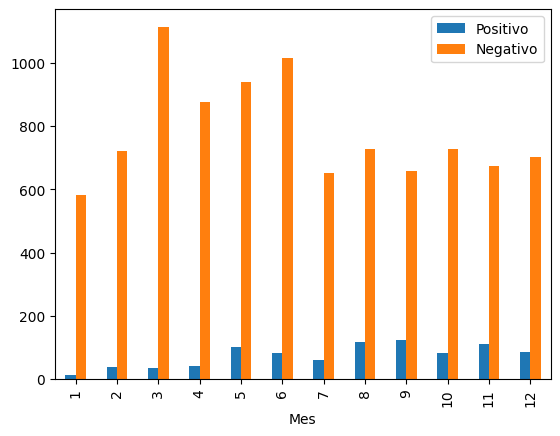

In [14]:
#data_output.groupby(data_output["Fecha"].dt.month)['Fecha'].count().plot(kind="bar", xlabel="Mes")
data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)

data_output.groupby(data_output["Fecha"].dt.month).agg({'Positivo':'sum','Negativo':'sum'}).plot(kind="bar", xlabel="Mes")


/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_77709/4105789646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


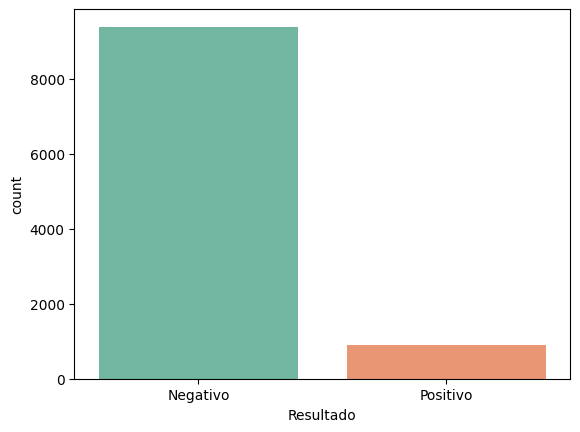

In [15]:
ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


In [16]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


/Users/alejandropasos/code/seder/locust/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


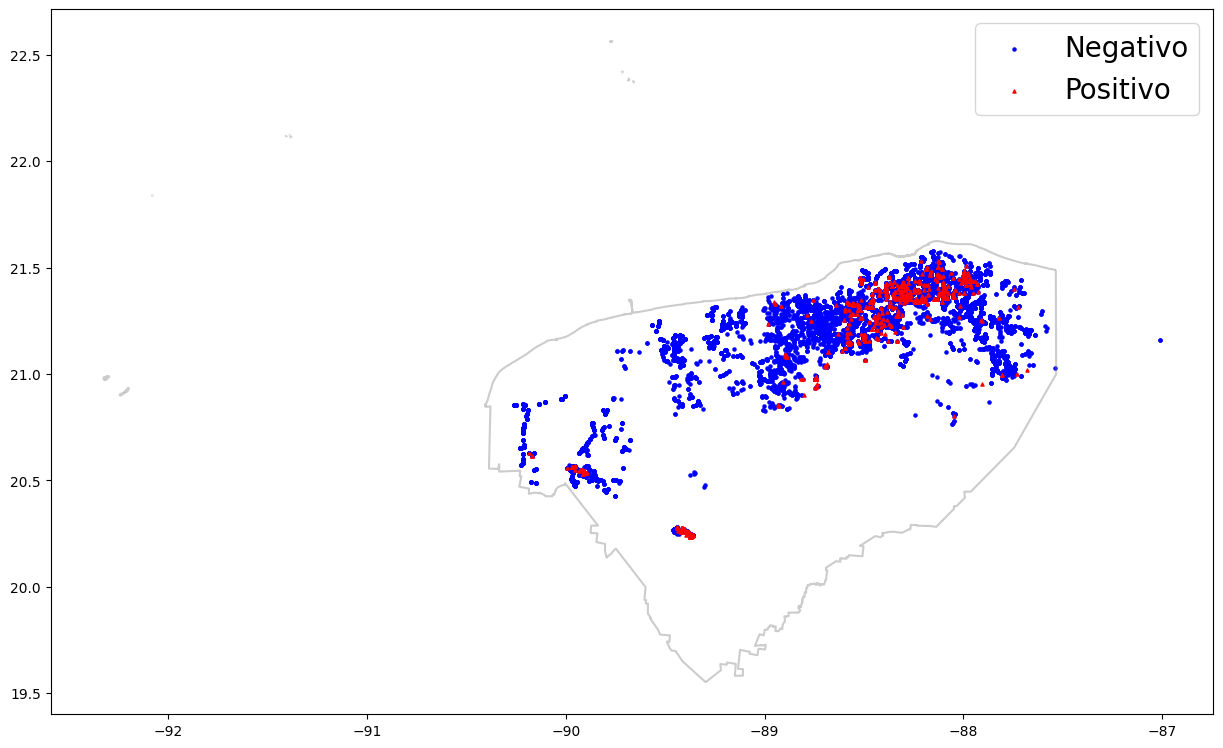

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='blue', 
                                       marker='o', 
                                       label='Negativo')
geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')
plt.legend(prop={'size':20})
